In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./bank-additional/bank-additional-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.replace({"unknown": np.nan}, inplace=True)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
df['job'].isnull().sum()

330

In [9]:
for col in df.columns:
    null_sum = df[col].isnull().sum()
    print(f'{col} null: ',null_sum)

age null:  0
job null:  330
marital null:  80
education null:  1731
default null:  8597
housing null:  990
loan null:  990
contact null:  0
month null:  0
day_of_week null:  0
duration null:  0
campaign null:  0
pdays null:  0
previous null:  0
poutcome null:  0
emp.var.rate null:  0
cons.price.idx null:  0
cons.conf.idx null:  0
euribor3m null:  0
nr.employed null:  0
y null:  0


In [10]:
len(df)

41188

In [11]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [12]:
df['deposit_subscription'] = df['y']

In [17]:
categorical_columns = [
    'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome',
    'deposit_subscription']

numerical_columns = [
    'duration', 'campaign', 'pdays',
    'previous', 'emp.var.rate', 'cons.price.idx', 
    'cons.conf.idx', 'euribor3m', 'nr.employed'
]

###  Plot 1

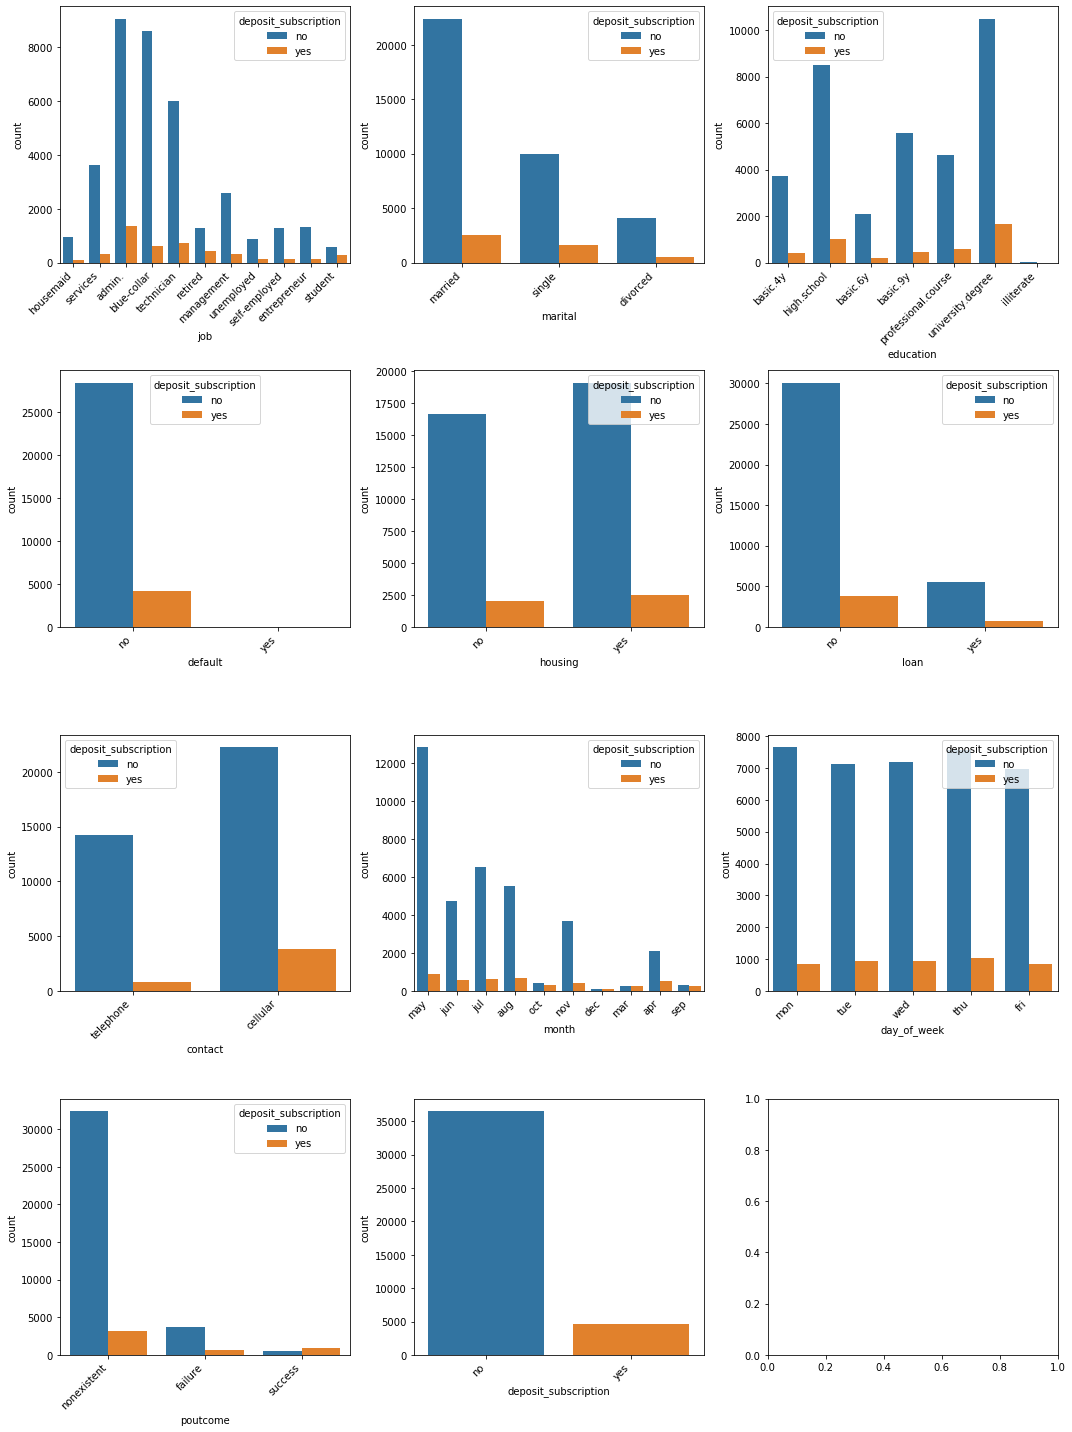

In [18]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))

for i, col_name in enumerate(categorical_columns):
    
    tmp_ax = axes[i//3, i%3]
    if col_name != 'deposit_subscription':
        cnt_plot = sns.countplot(ax = tmp_ax, x=col_name, hue ='deposit_subscription', data=df)
    else:
        cnt_plot = sns.countplot(ax = tmp_ax, x='deposit_subscription', data=df)
    #tmp_ax.bar(counts.index, counts)
    cnt_plot.set_xticklabels(cnt_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()

In [78]:
def get_val_counts(col_name):
    vc = df[[col_name, 'y']].value_counts()
    names = []
    for i in range(len(vc)):
        names.append(vc.index[i][0])
        name_set = set(names)
    return vc, name_set

In [102]:
def get_subscription_percentage(name, val_counts):
    no_ct = 0
    yes_ct = 0
    val_count_idx = val_counts.index
    for idx in val_count_idx:
        if name in idx:
            if 'no' in idx:
                no_ct = val_counts[idx]
            if 'yes' in idx:
                yes_ct = val_counts[idx]              
    return yes_ct /( yes_ct + no_ct)            

In [112]:
def get_subscription_percentage_column(col_name):
    val_counts, name_set = get_val_counts(col_name)
    
    perc_dict = {}    
    for name in name_set:
        perc_dict[name] = get_subscription_percentage(name, val_counts)
    
    return perc_dict        

### Plot 2

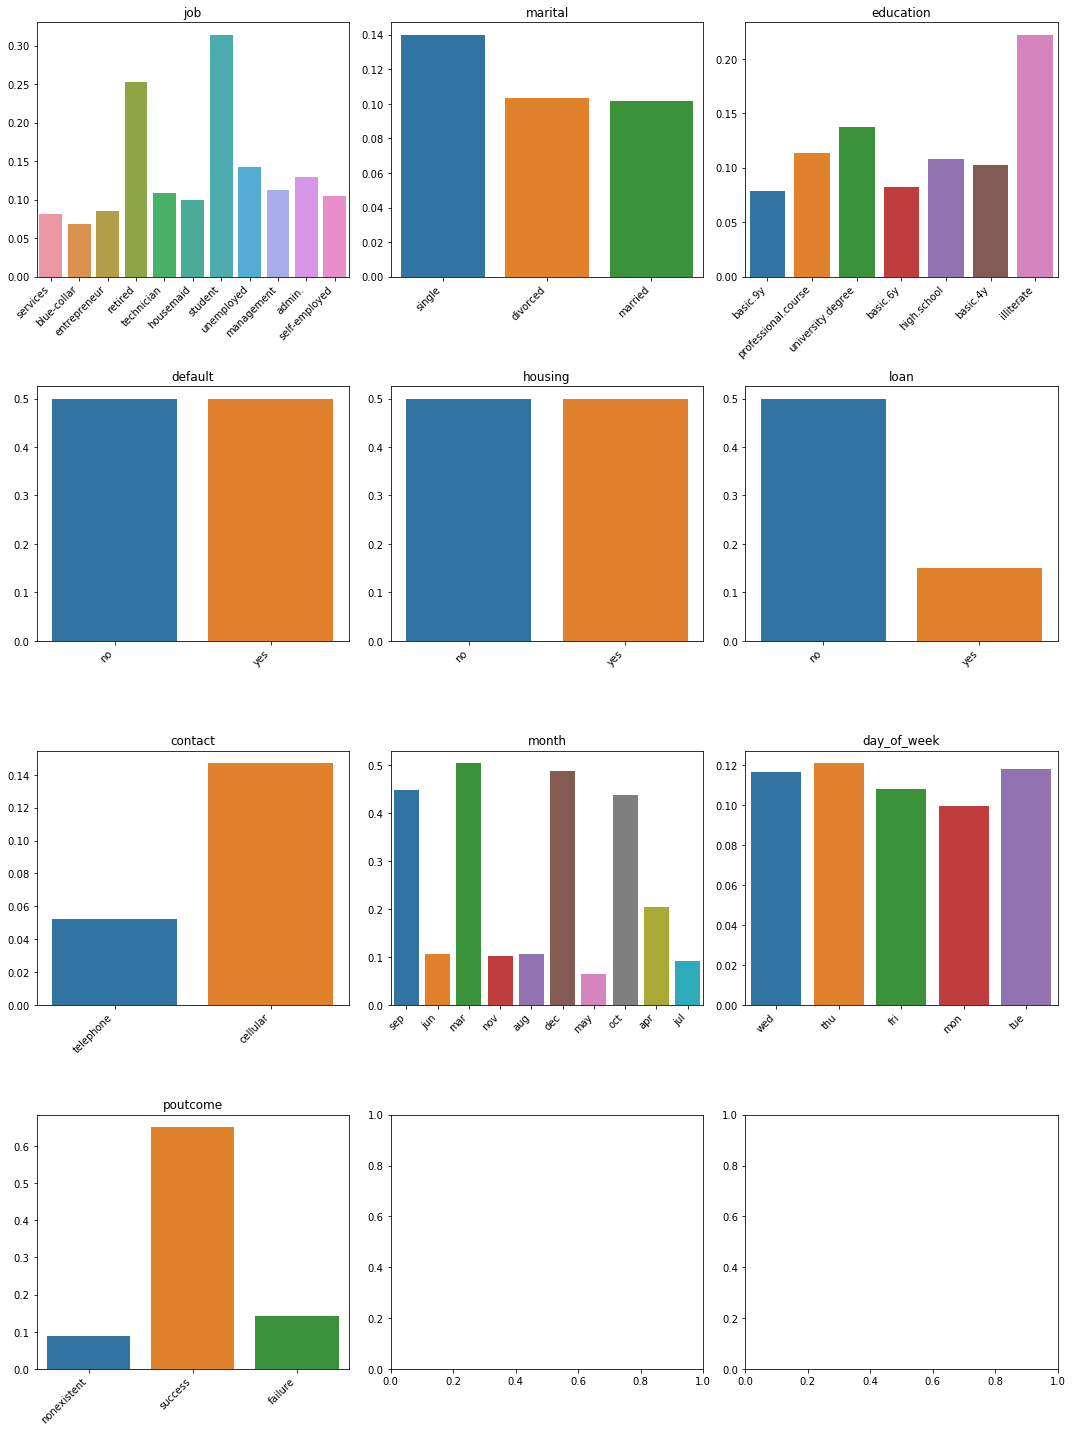

In [119]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))

for i, col_name in enumerate(categorical_columns[:-1]):

    tmp_ax = axes[i//3, i%3]
    
    perc_dict = get_subscription_percentage_column(col_name)
    
    bplot = sns.barplot(ax = tmp_ax, x= list(perc_dict.keys()), y = list(perc_dict.values()))
    bplot.set_xticklabels(bplot.get_xticklabels(), rotation=45, horizontalalignment='right')
    tmp_ax.set_title(col_name)
plt.tight_layout()

In [123]:
y_counts = df['y'].value_counts()
y_counts

no     36548
yes     4640
Name: y, dtype: int64

In [128]:
overall_subcription_rate = y_counts['yes']/y_counts.sum()
overall_subcription_rate

0.11265417111780131

### Conclusion:
**Based on the above plots, previous success in "poutcome" column (outcome of the previous marketing campaign) led to high deposit subscription (plot2). However, "poutcome" success counts is very low (see plot1), indicting uncertainty of this association**

**Similarly, subscription rates were high in Mar, Sept, Oct, Dec, which also have low data counts. 'illiterate' in 'education' column also suffer very low data counts to make high subscription rate association harder to interpret.**

**Students and retirees have high deposit subscriptins in "job" column.** 

**Subscription rate was much higher with people with cellular phones than telephones in 'contact' column. The data counts were high too (see plot1)**

### Plot 3

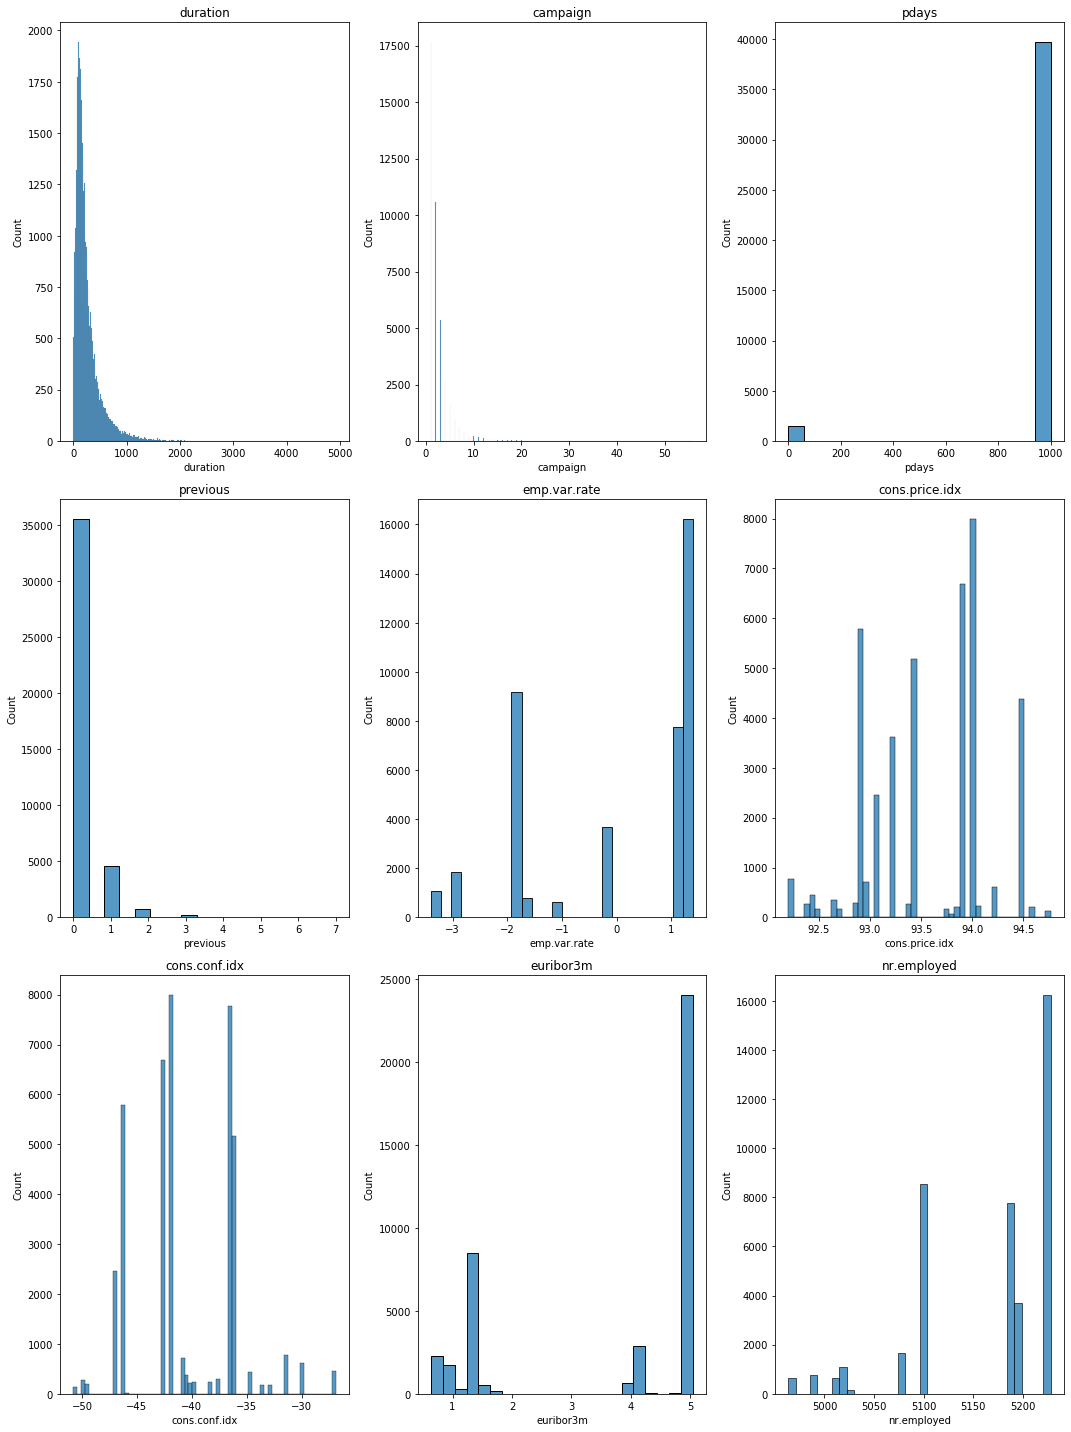

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(15, 20))

for i, col_name in enumerate(numerical_columns):
    
    tmp_ax = axes[i//3, i%3]
    h_plot = sns.histplot(ax = tmp_ax, x=col_name, data=df)
    #tmp_ax.bar(counts.index, counts)
    #h_plot.set_xticklabels(cnt_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
    tmp_ax.set_title(col_name)
plt.tight_layout()

### Conclusion
**Data in numeric columns are not normally distributed, and mostly concentrated on a few values.**  

In [22]:
df['pdays'].unique() # Days that passed by after the client was last contacted, 999 means client was not previously contacted

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [25]:
pday = df.loc[df['pdays']<30].pdays  # Remove pdays=999 data

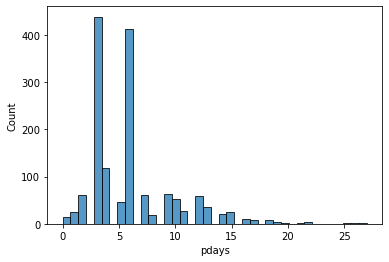

In [27]:
# Replot
sns.histplot(x=pday)